# Explore

## Contents

- [Updates](#Updates)
- [Wrangle](#Wrangle)
- [Target](#Target)
- [Quant_cols](#Quant_cols)
- [Recoder](#Recoder)
- [Countplot](#Countplot)
- [Tricols](#Tricols)
- [Chi2](#Chi2)

## Updates
[*Back to top*](#Contents)

In [1]:
# Python updates

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import itertools as it

In [2]:
# Local updates

import sys
sys.path.append('../')
import wrangle

In [3]:
 # Jupyter notebooks only #
def ifull(obj):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        display(obj)

## Wrangle
[*Back to top*](#Contents)

In [4]:
df, dictdf = wrangle.wrangle_data()
print(df.shape)
display(df.head(5))
display(df.describe().T)

(726, 77)


,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,session_workshop,session_network,session_social_event,session_qa,sesson_topic_tables,other_conference_types,ideal_topics,ideal_attendees,recommendations,persona_id
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,3,2,0,3,3,3,3,...,2,3,2,2,2,NaN,research-practice connections,NaN,research-practice connections,2
288,Academic,4,1.0,1,2,1,3,3,3,3,...,3,3,1,1,2,NaN,NaN,NaN,Don’t create schedule conflicts with other rel...,2
294,Academic,4,1.0,3,3,1,3,1,3,3,...,2,2,2,2,2,NaN,NaN,NaN,Looking forward! \n,2
281,Academic,4,1.0,3,4,0,2,3,2,0,...,3,2,2,3,2,NaN,"Research design, innovative methods, communica...",NaN,NaN,2
280,Academic,4,1.0,3,3,0,1,1,3,2,...,3,2,1,2,2,You should consider the combination of confere...,NaN,NaN,NaN,2


,count,mean,std,min,25%,50%,75%,max
job_conduct_res,726.0,2.856749,1.025941,0.0,3.0,3.0,4.0,4.0
job_analyze_res,726.0,2.913223,0.939210,0.0,3.0,3.0,3.0,4.0
job_buy_res_report,726.0,0.402204,0.720686,0.0,0.0,0.0,1.0,4.0
job_manage_res_proj,726.0,2.600551,1.166285,0.0,2.0,3.0,3.0,4.0
job_observe_res,726.0,1.982094,1.134273,0.0,1.0,2.0,3.0,4.0
job_plan_res,726.0,2.931129,0.950177,0.0,3.0,3.0,4.0,4.0
job_teach_res,726.0,1.845730,1.236637,0.0,1.0,2.0,3.0,4.0
job_advocate_res,726.0,2.924242,1.056235,0.0,3.0,3.0,4.0,4.0
job_hire_res_vendor,726.0,0.776860,0.914143,0.0,0.0,1.0,1.0,4.0
job_lead_res_team,726.0,1.860882,1.486931,0.0,0.0,2.0,3.0,4.0


## Target
[*Back to top*](#Contents)

In [5]:
learning_conference_int = np.array(df['learning_conference'] >1).astype('int32')
likely_conference_int = np.array(df['likely_conference']>1).astype('int32')
df['target'] = (learning_conference_int + likely_conference_int) / 2

In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 284 to 2
Data columns (total 78 columns):
job_title                    726 non-null category
job_taxo                     726 non-null category
job_id                       723 non-null category
job_conduct_res              726 non-null int64
job_analyze_res              726 non-null int64
job_buy_res_report           726 non-null int64
job_manage_res_proj          726 non-null int64
job_observe_res              726 non-null int64
job_plan_res                 726 non-null int64
job_teach_res                726 non-null int64
job_advocate_res             726 non-null int64
job_hire_res_vendor          726 non-null int64
job_lead_res_team            726 non-null int64
num_employees                723 non-null category
num_researchers              722 non-null category
primary_industry             726 non-null category
types_res_used               690 non-null category
future_res                   609 non-null category
exp_con

None

In [7]:
print(dictdf.shape)
display(dictdf)
display(dictdf.describe().T)

(79, 11)


,column_name,is_required,from_orig_file,in_wrangle,char_type,function,data_type,encoder,survey_section,question_group,question_text
qid,,,,,,,,,,,
q00,resp_id,True,True,True,numeric,identification,int64,NaN,Survey,ID,Entry Id
q01a,job_title,True,True,True,text,categorical,category,NaN,Work,Position,Title
q01b,job_taxo,True,True,True,numeric,categorical,category,NaN,Work,Position,Job Taxo ID
q01c,job_id,False,True,True,numeric,categorical,category,NaN,Work,Position,Job ID
q02a,job_conduct_res,True,True,True,numeric,quantitative,int64,often5,Work,Research Duties,Conducting Research
...,...,...,...,...,...,...,...,...,...,...,...
q20,other_conference_types,False,True,True,text,qualitative,object,NaN,Conference 2,Sessions of Interest,Did we miss any other types of conference sess...
q21,ideal_topics,False,True,True,text,qualitative,object,NaN,Conference 2,Desired Topics,"If attending a conference about research, what..."
q22,ideal_attendees,False,True,True,text,qualitative,object,NaN,Conference 2,Desired Attendees,"If attending a conference about research, who ..."


,count,unique,top,freq
column_name,79,79,exp_analyze_res,1
is_required,79,2,True,61
from_orig_file,79,2,True,72
in_wrangle,79,2,True,78
char_type,79,3,numeric,66
function,79,5,quantitative,51
data_type,79,4,int64,52
encoder,59,11,important5,18
survey_section,78,6,Conference 2,20
question_group,78,23,Research Experience,10


In [8]:
df.research_educ_cat.value_counts()

True     546
False    180
Name: research_educ_cat, dtype: int64

In [9]:
df.research_educ_cat.astype('bool').value_counts()

True     546
False    180
Name: research_educ_cat, dtype: int64

## Recoder
[*Back to top*](#Contents)

In [10]:
recoder_dictionaries = {
    2: {
        "important5": 'r5to2',
        "likely5": 'r5to2',
        "often4": 'r4to2',
        "often5": 'r5to2',
        "tenure6": 'r6to2',
    },
    3: {
        "important5": 'r5to3',
        "likely5": 'r5to3',
        "often4": 'r4to2',
        "often5": 'r5to3',
        "tenure6": 'r6to3',            
    },
}

In [11]:
recoder = {
    'r2to2': {
        0: 0,
        1: 1,
    },
    'r4to2': {
        0: 0,
        1: 0,
        2: 1,
        3: 1,
    },
    'r5to2': {
        0: 0,
        1: 0,
        2: 1,
        3: 1,
        4: 1,
    },
    'r5to3': {
        0: 0,
        1: 0,
        2: .5,
        3: 1,
        4: 1,
    },
    'r6to2': {
        0: 0,
        1: 0,
        2: 0,
        3: 1,
        4: 1,
        5: 1,
    },
    'r6to3': {
        0: 0,
        1: 0,
        2: .5,
        3: .5,
        4: 1,
        5: 1,
    },
}

In [12]:
# Get mapping dictionary
def get_recoder_dictionary(data_dictionary, recoder_dictionaries):

    recode_df = data_dictionary[['column_name','encoder']].copy().dropna()
    recode_df['col'] = recode_df.column_name
    recode_df=recode_df.set_index('column_name')
    levels = [level for level in recoder_dictionaries]
    for chk in range(len(levels)):
        level = levels[chk]
        recoder_dictionary = recoder_dictionaries[level]
        recodes = [recode for recode in recoder_dictionary]
        tempdf = recode_df[recode_df.encoder.isin(recodes)].copy()
        tempdf[level] = tempdf.encoder.apply(lambda x: recoder_dictionary[x])
        recode_df = recode_df.join(tempdf[[level]], how='left')
    recode_df = recode_df.dropna(subset=[levels[0]])
    return recode_df



In [13]:
def recode_columns(df, recode_df, recoder, outputs):
    '''
    '''
    use_df = df.copy()
    allcols=recode_df.col
    check_dicts=recode_df[outputs]
    cols=[chkcol for chkcol in allcols if chkcol in use_df.columns]
    for col in cols:
        use_dict = recoder[check_dicts[col]]
        encoded = use_df[col].apply(lambda x: use_dict[x])
        use_df[col] = encoded
    return use_df



In [14]:
check_recoder = get_recoder_dictionary(dictdf, recoder_dictionaries)
check_recoder

,encoder,col,2,3
column_name,,,,
job_conduct_res,often5,job_conduct_res,r5to2,r5to3
job_analyze_res,often5,job_analyze_res,r5to2,r5to3
job_buy_res_report,often5,job_buy_res_report,r5to2,r5to3
job_manage_res_proj,often5,job_manage_res_proj,r5to2,r5to3
job_observe_res,often5,job_observe_res,r5to2,r5to3
job_plan_res,often5,job_plan_res,r5to2,r5to3
job_teach_res,often5,job_teach_res,r5to2,r5to3
job_advocate_res,often5,job_advocate_res,r5to2,r5to3
job_hire_res_vendor,often5,job_hire_res_vendor,r5to2,r5to3


In [15]:
dfrecode3 = recode_columns(df, check_recoder, recoder, outputs=3)
display(dfrecode3.head())
display(dfrecode3.describe().T)

,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,session_network,session_social_event,session_qa,sesson_topic_tables,other_conference_types,ideal_topics,ideal_attendees,recommendations,persona_id,target
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,...,1.0,0.5,0.5,0.5,NaN,research-practice connections,NaN,research-practice connections,2,1.0
288,Academic,4,1.0,0.0,0.5,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.5,NaN,NaN,NaN,Don’t create schedule conflicts with other rel...,2,1.0
294,Academic,4,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.5,0.5,0.5,0.5,NaN,NaN,NaN,Looking forward! \n,2,1.0
281,Academic,4,1.0,1.0,1.0,0.0,0.5,1.0,0.5,0.0,...,0.5,0.5,1.0,0.5,NaN,"Research design, innovative methods, communica...",NaN,NaN,2,1.0
280,Academic,4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,...,0.5,0.0,0.5,0.5,You should consider the combination of confere...,NaN,NaN,NaN,2,1.0


,count,mean,std,min,25%,50%,75%,max
job_conduct_res,726.0,0.811295,0.372591,0.0,1.0,1.0,1.0,1.0
job_analyze_res,726.0,0.840220,0.343342,0.0,1.0,1.0,1.0,1.0
job_buy_res_report,726.0,0.045455,0.180038,0.0,0.0,0.0,0.0,1.0
job_manage_res_proj,726.0,0.715565,0.416908,0.0,0.5,1.0,1.0,1.0
job_observe_res,726.0,0.488292,0.455844,0.0,0.0,0.5,1.0,1.0
job_plan_res,726.0,0.835399,0.340548,0.0,1.0,1.0,1.0,1.0
job_teach_res,726.0,0.457300,0.463385,0.0,0.0,0.5,1.0,1.0
job_advocate_res,726.0,0.811983,0.352500,0.0,1.0,1.0,1.0,1.0
job_hire_res_vendor,726.0,0.111570,0.294695,0.0,0.0,0.0,0.0,1.0
job_lead_res_team,726.0,0.460744,0.463318,0.0,0.0,0.5,1.0,1.0


In [16]:
dfrecode2 = recode_columns(df, check_recoder, recoder, outputs=2)
display(dfrecode2.head())
display(dfrecode2.describe().T)

,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,session_network,session_social_event,session_qa,sesson_topic_tables,other_conference_types,ideal_topics,ideal_attendees,recommendations,persona_id,target
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,1,1,0,1,1,1,1,...,1,1,1,1,NaN,research-practice connections,NaN,research-practice connections,2,1.0
288,Academic,4,1.0,0,1,0,1,1,1,1,...,1,0,0,1,NaN,NaN,NaN,Don’t create schedule conflicts with other rel...,2,1.0
294,Academic,4,1.0,1,1,0,1,0,1,1,...,1,1,1,1,NaN,NaN,NaN,Looking forward! \n,2,1.0
281,Academic,4,1.0,1,1,0,1,1,1,0,...,1,1,1,1,NaN,"Research design, innovative methods, communica...",NaN,NaN,2,1.0
280,Academic,4,1.0,1,1,0,0,0,1,1,...,1,0,1,1,You should consider the combination of confere...,NaN,NaN,NaN,2,1.0


,count,mean,std,min,25%,50%,75%,max
job_conduct_res,726.0,0.840220,0.366654,0.0,1.0,1.0,1.0,1.0
job_analyze_res,726.0,0.873278,0.332890,0.0,1.0,1.0,1.0,1.0
job_buy_res_report,726.0,0.067493,0.251047,0.0,0.0,0.0,0.0,1.0
job_manage_res_proj,726.0,0.775482,0.417552,0.0,1.0,1.0,1.0,1.0
job_observe_res,726.0,0.573003,0.494983,0.0,0.0,1.0,1.0,1.0
job_plan_res,726.0,0.878788,0.326599,0.0,1.0,1.0,1.0,1.0
job_teach_res,726.0,0.524793,0.499729,0.0,0.0,1.0,1.0,1.0
job_advocate_res,726.0,0.869146,0.337473,0.0,1.0,1.0,1.0,1.0
job_hire_res_vendor,726.0,0.136364,0.343411,0.0,0.0,0.0,0.0,1.0
job_lead_res_team,726.0,0.528926,0.499507,0.0,0.0,1.0,1.0,1.0


## Quant_cols
[*Back to top*](#Contents)

In [17]:
#Quantitative columns
quant_cols = df.select_dtypes([int,float,bool]).columns
quant_cols.to_list()

['job_conduct_res',
 'job_analyze_res',
 'job_buy_res_report',
 'job_manage_res_proj',
 'job_observe_res',
 'job_plan_res',
 'job_teach_res',
 'job_advocate_res',
 'job_hire_res_vendor',
 'job_lead_res_team',
 'exp_conduct_res',
 'exp_analyze_res',
 'exp_buy_res_report',
 'exp_manage_res_proj',
 'exp_observe_res',
 'exp_plan_res',
 'exp_teach_res',
 'exp_advocate_res',
 'exp_hire_res_vendor',
 'exp_lead_res_team',
 'research_educ_cat',
 'learning_talks',
 'learning_read',
 'learning_meetup',
 'learning_workshop',
 'learning_conference',
 'likely_watch_video',
 'likely_internet',
 'likely_book',
 'likely_online_group',
 'likely_colleague',
 'likely_meetup',
 'likely_conference',
 'likely_workshop',
 'factor_speaker',
 'factor_diverse_speak',
 'factor_topics',
 'factor_format_sessions',
 'factor_size',
 'factor_network',
 'factor_variety_attend',
 'factor_code',
 'factor_location',
 'factor_ability_to_pay',
 'ideal_multi_track',
 'ideal_single_track',
 'ideal_unconference',
 'session_key

In [18]:
x = quant_cols.drop(['likely_conference','learning_conference']).to_list()+['persona_id', 'job_taxo']
y = 'target'

## Countplot
[*Back to top*](#Contents)

In [19]:
def countplot_cols(df, cols):
    chk_cols = [col for col in cols if col in df.columns]
    for chk_col in chk_cols:
        plot_col = df[chk_col].value_counts().sort_index()
        use_bins = plot_col.nunique()
        print(f'Column: {chk_col}, {use_bins} unique values')
        print(plot_col)
        plot_col.plot.bar()
        plt.show()

        

Column: job_conduct_res, 5 unique values
0     17
1     99
2     42
3    381
4    187
Name: job_conduct_res, dtype: int64


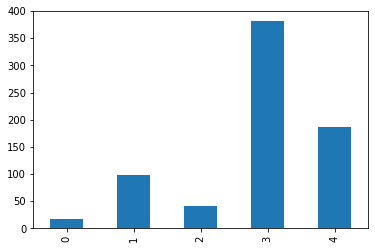

Column: job_analyze_res, 5 unique values
0     10
1     82
2     48
3    407
4    179
Name: job_analyze_res, dtype: int64


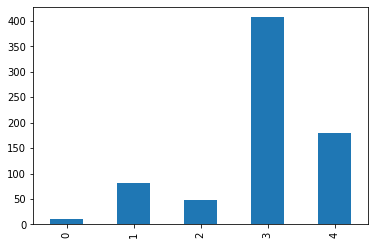

Column: job_buy_res_report, 5 unique values
0    506
1    171
2     32
3     11
4      6
Name: job_buy_res_report, dtype: int64


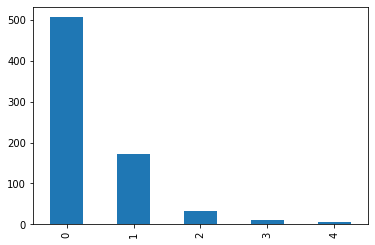

Column: job_manage_res_proj, 5 unique values
0     40
1    123
2     87
3    313
4    163
Name: job_manage_res_proj, dtype: int64


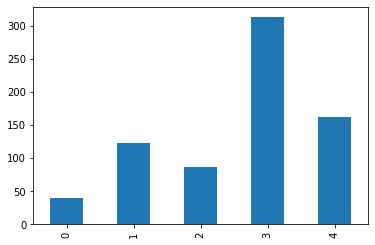

Column: job_observe_res, 5 unique values
0     53
1    257
2    123
3    236
4     57
Name: job_observe_res, dtype: int64


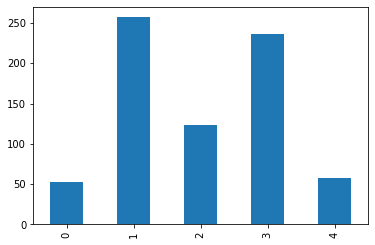

Column: job_plan_res, 5 unique values
0      9
1     79
2     63
3    377
4    198
Name: job_plan_res, dtype: int64


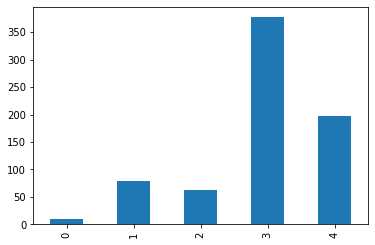

Column: job_teach_res, 5 unique values
0    108
1    237
2     98
3    225
4     58
Name: job_teach_res, dtype: int64


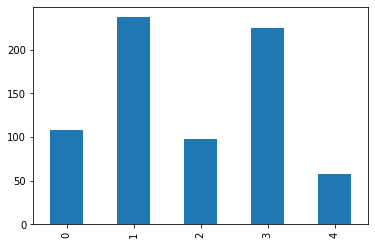

Column: job_advocate_res, 5 unique values
0     22
1     73
2     83
3    308
4    240
Name: job_advocate_res, dtype: int64


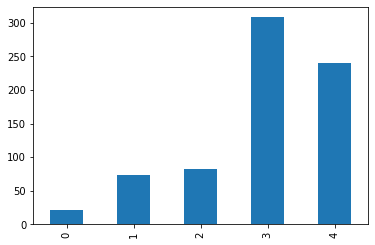

Column: job_hire_res_vendor, 5 unique values
0    329
1    298
2     36
3     58
4      5
Name: job_hire_res_vendor, dtype: int64


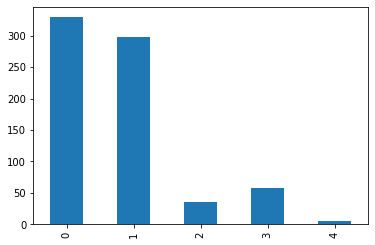

Column: job_lead_res_team, 5 unique values
0    187
1    155
2     99
3    142
4    143
Name: job_lead_res_team, dtype: int64


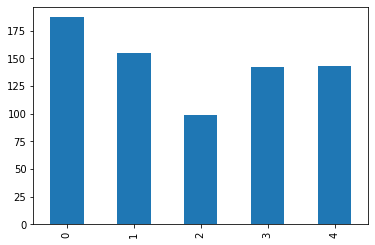

Column: exp_conduct_res, 6 unique values
0     23
1    105
2    126
3    104
4    125
5    243
Name: exp_conduct_res, dtype: int64


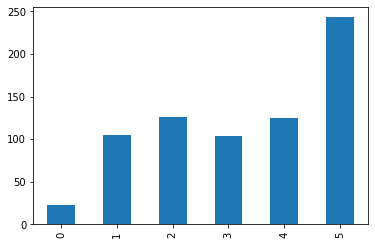

Column: exp_analyze_res, 6 unique values
0     21
1     99
2    123
3    113
4    121
5    249
Name: exp_analyze_res, dtype: int64


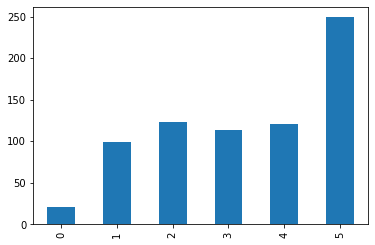

Column: exp_buy_res_report, 6 unique values
0    468
1     91
2     45
3     35
4     24
5     63
Name: exp_buy_res_report, dtype: int64


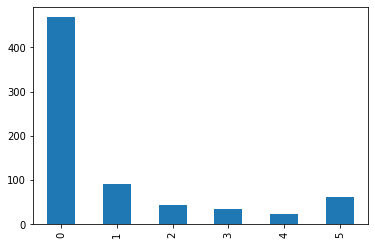

Column: exp_manage_res_proj, 6 unique values
0     76
1    163
2    128
3    103
4     96
5    160
Name: exp_manage_res_proj, dtype: int64


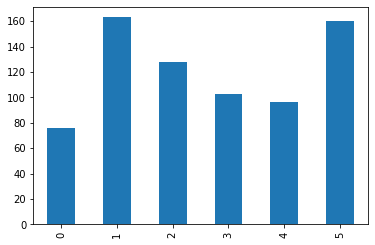

Column: exp_observe_res, 6 unique values
0     50
1    119
2    125
3     89
4    112
5    231
Name: exp_observe_res, dtype: int64


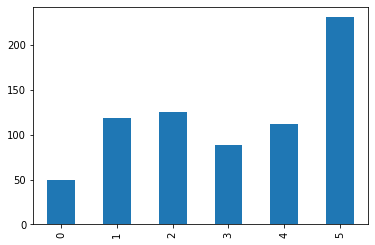

Column: exp_plan_res, 5 unique values
0     29
1    118
2    127
3    118
4    117
5    217
Name: exp_plan_res, dtype: int64


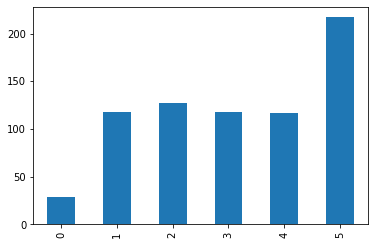

Column: exp_teach_res, 6 unique values
0    197
1    171
2    127
3     87
4     54
5     90
Name: exp_teach_res, dtype: int64


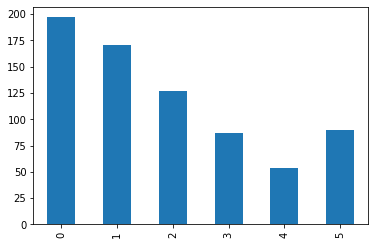

Column: exp_advocate_res, 6 unique values
0     64
1    126
2    132
3    101
4     98
5    205
Name: exp_advocate_res, dtype: int64


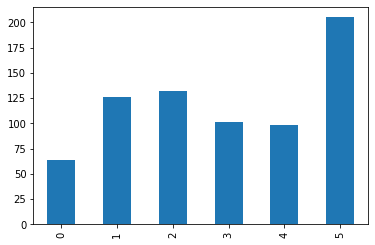

Column: exp_hire_res_vendor, 6 unique values
0    328
1    163
2     84
3     47
4     29
5     75
Name: exp_hire_res_vendor, dtype: int64


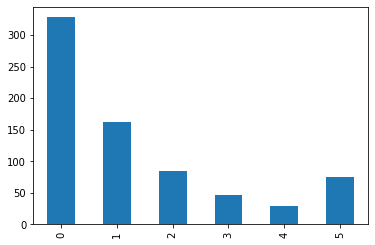

Column: exp_lead_res_team, 6 unique values
0    243
1    183
2    106
3     65
4     50
5     79
Name: exp_lead_res_team, dtype: int64


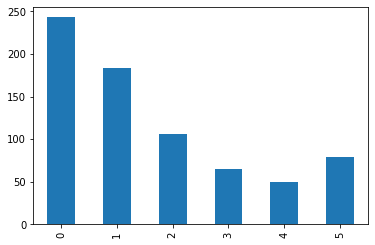

Column: research_educ_cat, 2 unique values
False    180
True     546
Name: research_educ_cat, dtype: int64


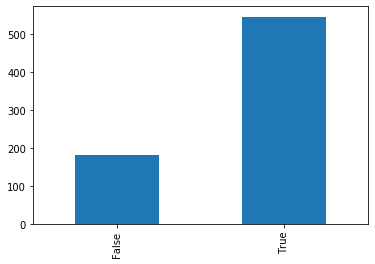

Column: learning_talks, 4 unique values
0     21
1    139
2    331
3    235
Name: learning_talks, dtype: int64


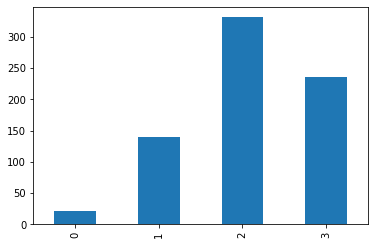

Column: learning_read, 4 unique values
0      2
1     31
2    179
3    514
Name: learning_read, dtype: int64


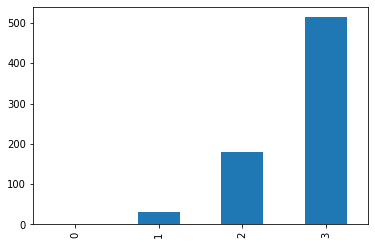

Column: learning_meetup, 4 unique values
0     38
1    226
2    304
3    158
Name: learning_meetup, dtype: int64


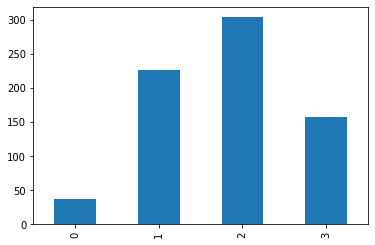

Column: learning_workshop, 4 unique values
0     74
1    309
2    284
3     59
Name: learning_workshop, dtype: int64


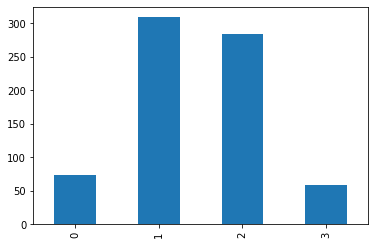

Column: likely_watch_video, 5 unique values
0     15
1     47
2    110
3    318
4    236
Name: likely_watch_video, dtype: int64


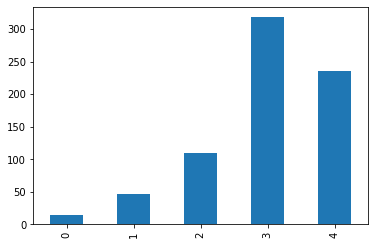

Column: likely_internet, 5 unique values
0      3
1     12
2     39
3    237
4    435
Name: likely_internet, dtype: int64


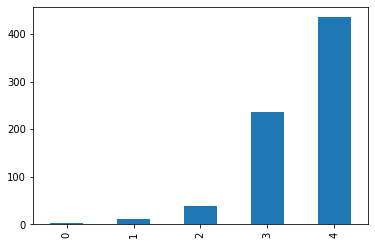

Column: likely_book, 5 unique values
0      4
1     26
2     80
3    281
4    335
Name: likely_book, dtype: int64


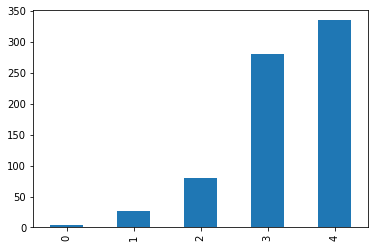

Column: likely_online_group, 5 unique values
0     68
1    191
2    194
3    161
4    112
Name: likely_online_group, dtype: int64


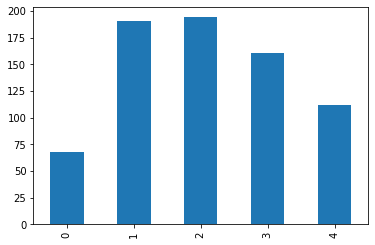

Column: likely_colleague, 5 unique values
0     16
1     41
2    113
3    274
4    282
Name: likely_colleague, dtype: int64


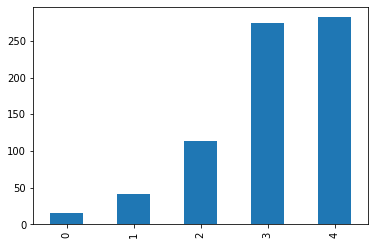

Column: likely_meetup, 5 unique values
0     49
1    168
2    202
3    201
4    106
Name: likely_meetup, dtype: int64


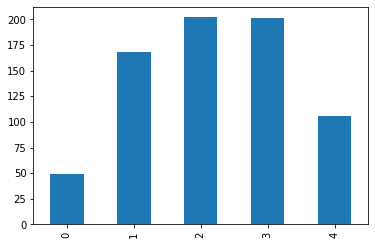

Column: likely_workshop, 5 unique values
0     33
1    145
2    187
3    249
4    112
Name: likely_workshop, dtype: int64


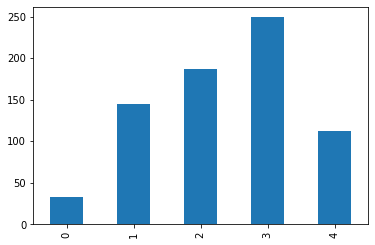

Column: factor_speaker, 5 unique values
0     54
1    170
2    140
3    274
4     88
Name: factor_speaker, dtype: int64


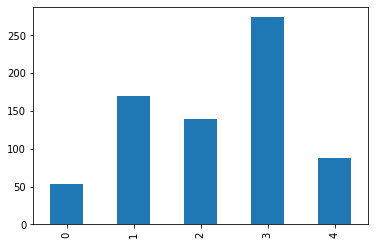

Column: factor_diverse_speak, 5 unique values
0     30
1     61
2    106
3    304
4    225
Name: factor_diverse_speak, dtype: int64


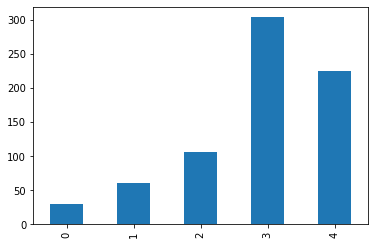

Column: factor_topics, 5 unique values
0      3
1      4
2     14
3    200
4    505
Name: factor_topics, dtype: int64


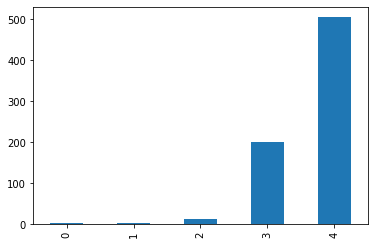

Column: factor_format_sessions, 5 unique values
0     12
1     51
2    185
3    317
4    161
Name: factor_format_sessions, dtype: int64


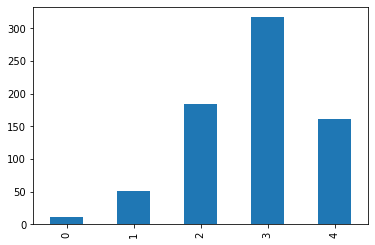

Column: factor_size, 5 unique values
0     56
1    160
2    193
3    210
4    107
Name: factor_size, dtype: int64


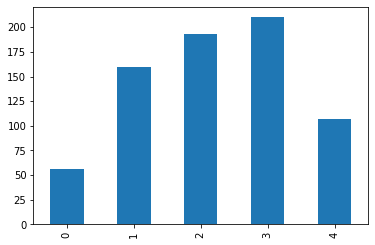

Column: factor_network, 5 unique values
0     80
1    146
2    254
3    187
4     59
Name: factor_network, dtype: int64


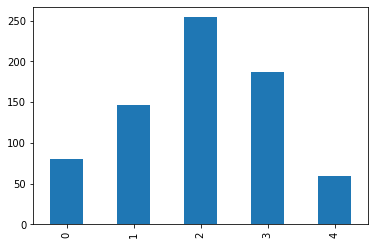

Column: factor_variety_attend, 5 unique values
0     86
1    148
2    221
3    201
4     70
Name: factor_variety_attend, dtype: int64


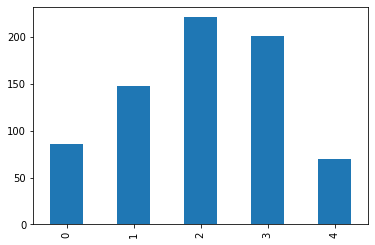

Column: factor_code, 5 unique values
0    135
1    128
2    219
3    160
4     84
Name: factor_code, dtype: int64


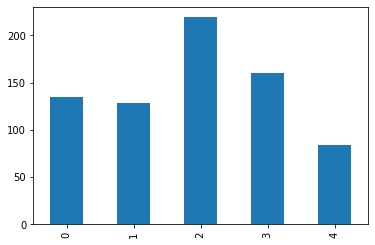

Column: factor_location, 5 unique values
0     17
1     61
2    113
3    289
4    246
Name: factor_location, dtype: int64


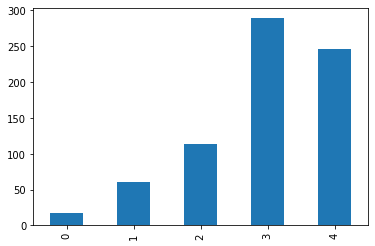

Column: factor_ability_to_pay, 5 unique values
0     17
1     34
2     57
3    198
4    420
Name: factor_ability_to_pay, dtype: int64


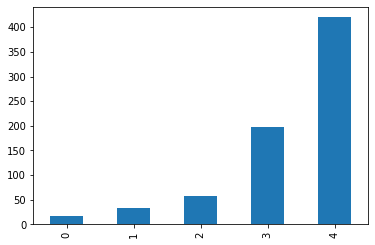

Column: ideal_multi_track, 2 unique values
False    272
True     454
Name: ideal_multi_track, dtype: int64


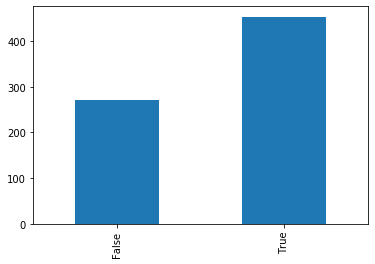

Column: ideal_single_track, 2 unique values
False    483
True     243
Name: ideal_single_track, dtype: int64


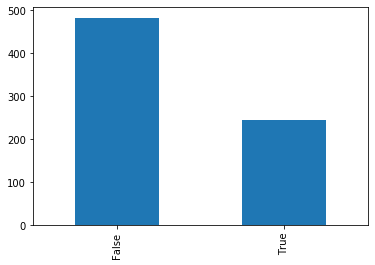

Column: ideal_unconference, 2 unique values
False    681
True      45
Name: ideal_unconference, dtype: int64


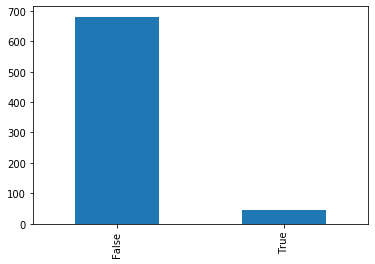

Column: session_keynote, 5 unique values
0     39
1     89
2     95
3    326
4    177
Name: session_keynote, dtype: int64


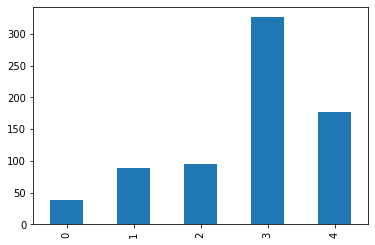

Column: session_long_talk, 5 unique values
0     22
1     67
2    124
3    367
4    146
Name: session_long_talk, dtype: int64


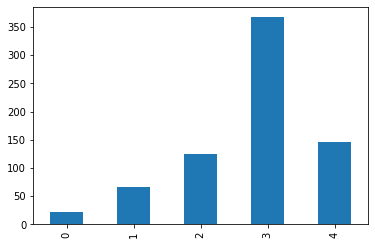

Column: session_short_talk, 5 unique values
0     54
1    115
2    171
3    301
4     85
Name: session_short_talk, dtype: int64


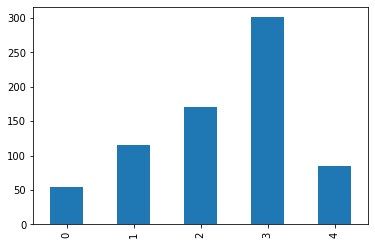

Column: session_workshop, 5 unique values
0     31
1     56
2     96
3    250
4    293
Name: session_workshop, dtype: int64


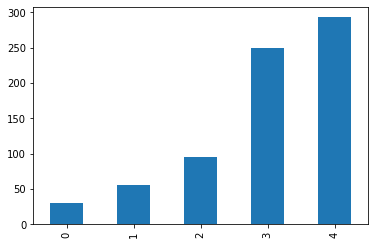

Column: session_network, 5 unique values
0     68
1    167
2    178
3    197
4    116
Name: session_network, dtype: int64


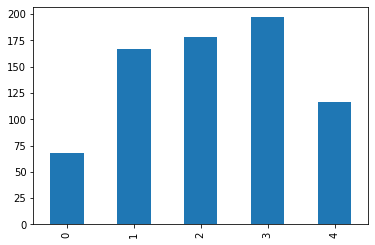

Column: session_social_event, 5 unique values
0    203
1    186
2    170
3    119
4     48
Name: session_social_event, dtype: int64


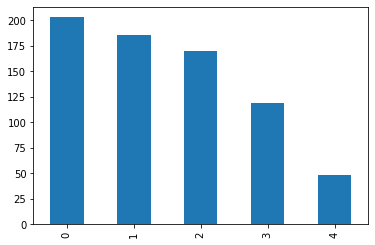

Column: session_qa, 5 unique values
0     75
1    149
2    207
3    203
4     92
Name: session_qa, dtype: int64


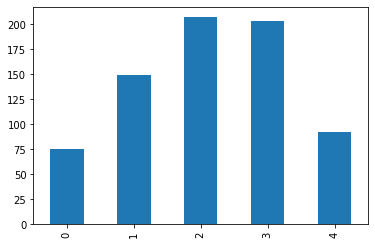

Column: sesson_topic_tables, 5 unique values
0     70
1     98
2    142
3    281
4    135
Name: sesson_topic_tables, dtype: int64


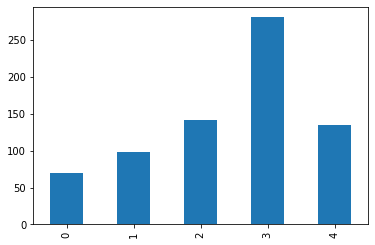

Column: target, 3 unique values
0.0    152
0.5    202
1.0    372
Name: target, dtype: int64


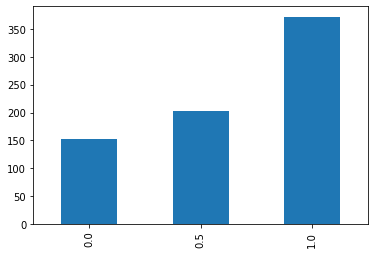

Column: persona_id, 4 unique values
1     94
2    123
3    234
4    181
5     94
Name: persona_id, dtype: int64


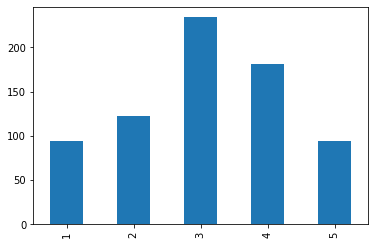

Column: job_taxo, 8 unique values
1    287
2    109
3     23
4     23
5     65
6    113
7     49
8     45
9     12
Name: job_taxo, dtype: int64


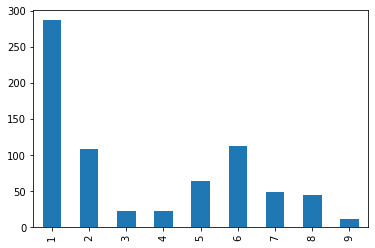

In [20]:
countplot_cols(df, x)

## Tricols
[*Back to top*](#Contents)

In [21]:
def countplot_tricols(df0, df1, df2, cols):
    cols0 = df0.columns.to_list()
    cols1 = df1.columns.to_list()
    cols2 = df2.columns.to_list()
    chk_col_list = set(cols0 + cols1 + cols2)
    chk_cols = [col for col in cols if col in chk_col_list]
#     print(chk_col_list)
#     chk_cols1 = [col for col in cols if col in df1.columns]
    for chk_col in chk_cols:
        print(chk_col)
        plot0, plot1, plot2, plot_it = False, False, False, False
        if chk_col in cols0:
            plot_col0 = df0[chk_col].astype('category').value_counts().sort_index()
            x0 = plot_col0.index
            y0 = plot_col0.to_list()
            n0 = len(y0)
            w0 = 1 - (.6 / (n0-1))
            plot0 = True
            plot_it=True
        if chk_col in cols1:
            plot_col1 = df1[chk_col].astype('category').value_counts().sort_index()
            x1 = plot_col1.index
            y1 = plot_col1.to_list()
            n1 = len(y1)
            w1 = 1 - (.6 / (n1-1))
            plot1 = True
            plot_it=True
        if chk_col in cols2:
            plot_col2 = df2[chk_col].astype('category').value_counts().sort_index()
            x2 = plot_col2.index
            y2 = plot_col2.to_list()
            n2 = len(y2)
            w2 = 1 - (.6 / (n2-1))
            plot2 = True
            plot_it=True
        if plot_it:
            print('0:', n0, w0, '1:', n1, w1, '2:', n2, w2)
            fig, axs = plt.subplots(
                nrows=1, 
                ncols=3, 
                figsize=(9,3),
                sharey=True, 
#                 squeeze=False, 
#                 subplot_kw=None, 
#                 gridspec_kw=None,
            )
            fig.suptitle(chk_col)
            if plot0:
                axs[0].bar(x0,y0,align='center',width=.85, tick_label=x0)
            if plot1:
                axs[1].bar(x1,y1,align='center',width=.45, tick_label=x1)
            if plot2:
                axs[2].bar(x2,y2,align='center',width=.45, tick_label=x2)
            plt.show()
        print('*****')

        

job_conduct_res
0: 5 0.85 1: 3 0.7 2: 2 0.4


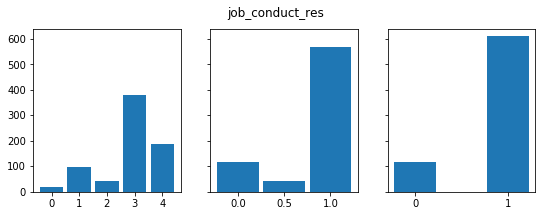

*****
job_analyze_res
0: 5 0.85 1: 3 0.7 2: 2 0.4


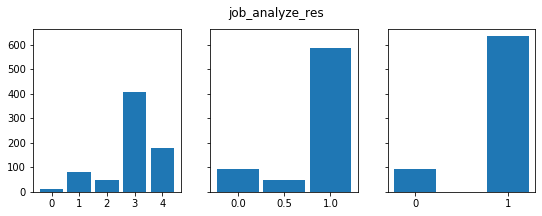

*****
job_buy_res_report
0: 5 0.85 1: 3 0.7 2: 2 0.4


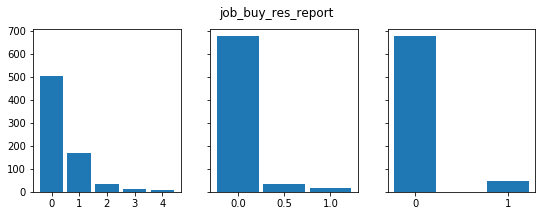

*****
job_manage_res_proj
0: 5 0.85 1: 3 0.7 2: 2 0.4


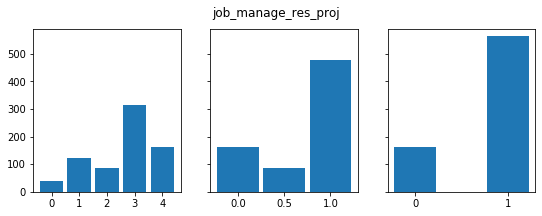

*****
job_observe_res
0: 5 0.85 1: 3 0.7 2: 2 0.4


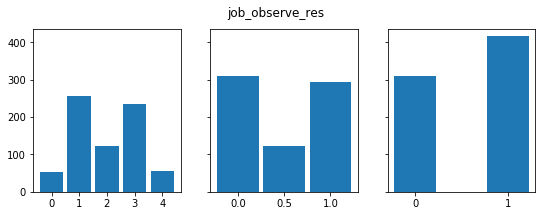

*****
job_plan_res
0: 5 0.85 1: 3 0.7 2: 2 0.4


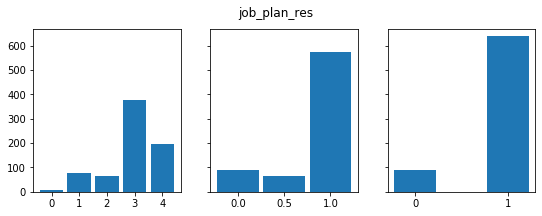

*****
job_teach_res
0: 5 0.85 1: 3 0.7 2: 2 0.4


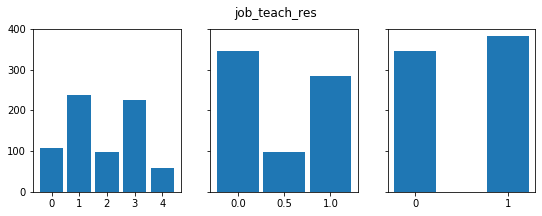

*****
job_advocate_res
0: 5 0.85 1: 3 0.7 2: 2 0.4


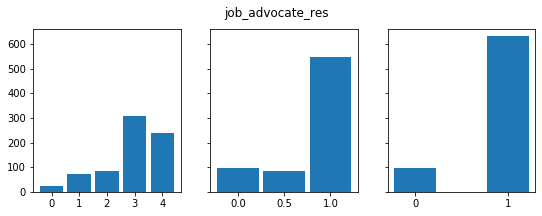

*****
job_hire_res_vendor
0: 5 0.85 1: 3 0.7 2: 2 0.4


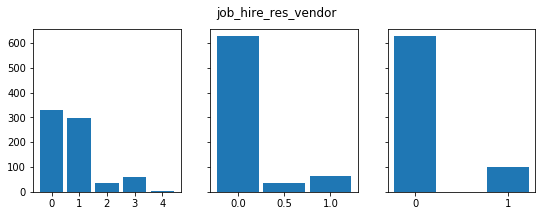

*****
job_lead_res_team
0: 5 0.85 1: 3 0.7 2: 2 0.4


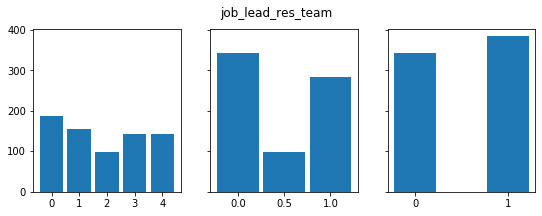

*****
exp_conduct_res
0: 6 0.88 1: 3 0.7 2: 2 0.4


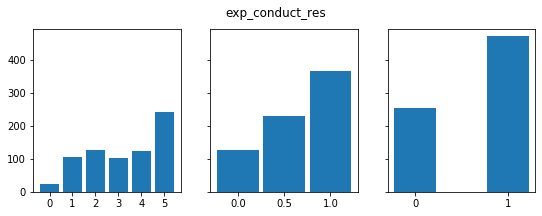

*****
exp_analyze_res
0: 6 0.88 1: 3 0.7 2: 2 0.4


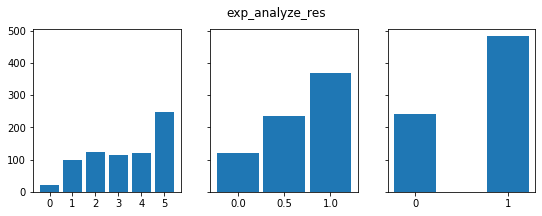

*****
exp_buy_res_report
0: 6 0.88 1: 3 0.7 2: 2 0.4


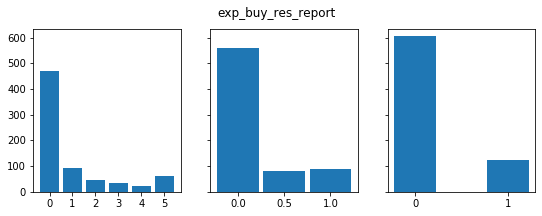

*****
exp_manage_res_proj
0: 6 0.88 1: 3 0.7 2: 2 0.4


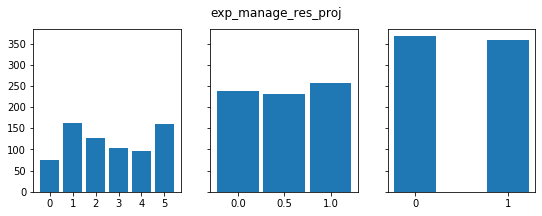

*****
exp_observe_res
0: 6 0.88 1: 3 0.7 2: 2 0.4


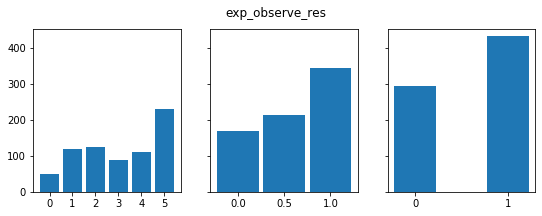

*****
exp_plan_res
0: 6 0.88 1: 3 0.7 2: 2 0.4


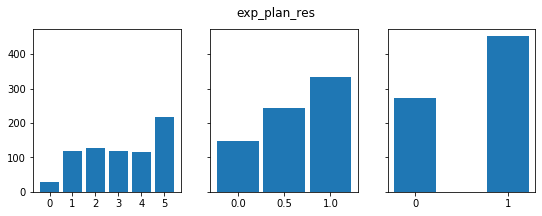

*****
exp_teach_res
0: 6 0.88 1: 3 0.7 2: 2 0.4


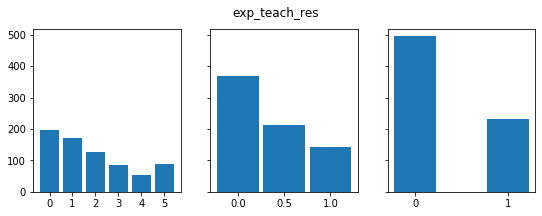

*****
exp_advocate_res
0: 6 0.88 1: 3 0.7 2: 2 0.4


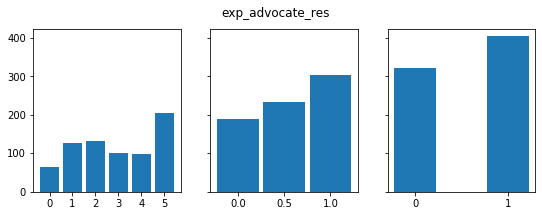

*****
exp_hire_res_vendor
0: 6 0.88 1: 3 0.7 2: 2 0.4


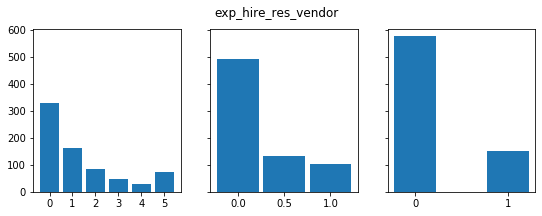

*****
exp_lead_res_team
0: 6 0.88 1: 3 0.7 2: 2 0.4


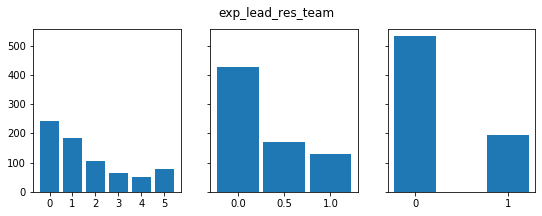

*****
research_educ_cat
0: 2 0.4 1: 2 0.4 2: 2 0.4


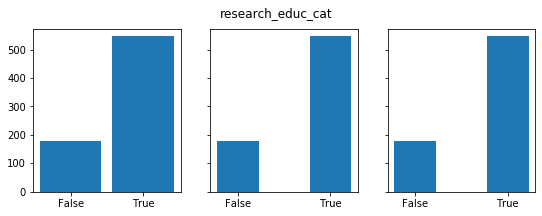

*****
learning_talks
0: 4 0.8 1: 2 0.4 2: 2 0.4


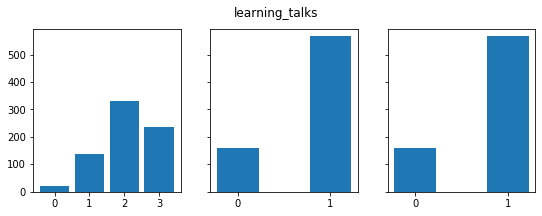

*****
learning_read
0: 4 0.8 1: 2 0.4 2: 2 0.4


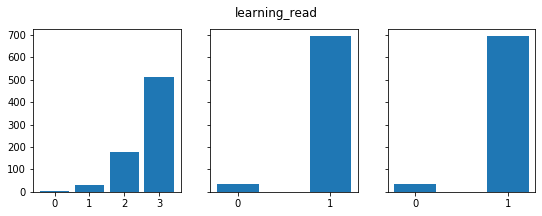

*****
learning_meetup
0: 4 0.8 1: 2 0.4 2: 2 0.4


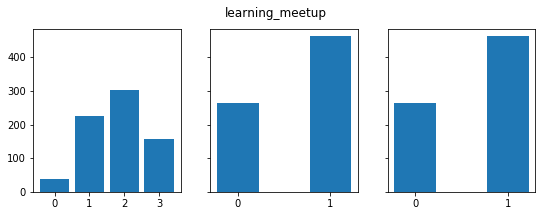

*****
learning_workshop
0: 4 0.8 1: 2 0.4 2: 2 0.4


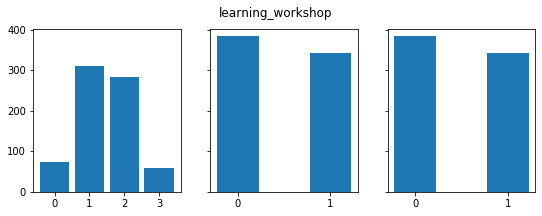

*****
likely_watch_video
0: 5 0.85 1: 3 0.7 2: 2 0.4


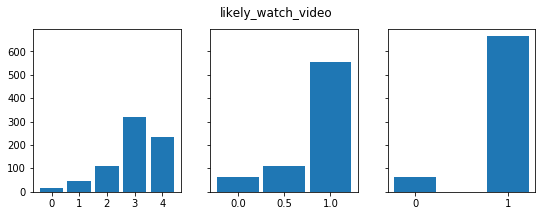

*****
likely_internet
0: 5 0.85 1: 3 0.7 2: 2 0.4


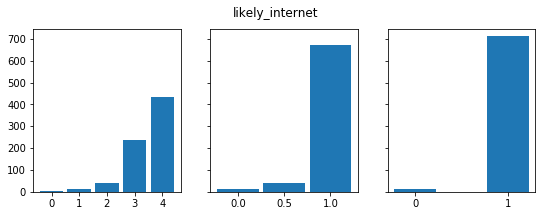

*****
likely_book
0: 5 0.85 1: 3 0.7 2: 2 0.4


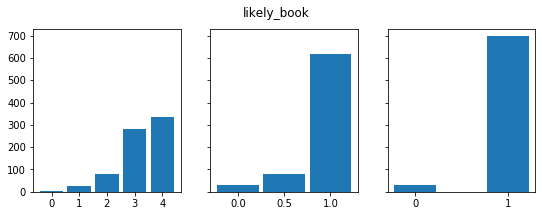

*****
likely_online_group
0: 5 0.85 1: 3 0.7 2: 2 0.4


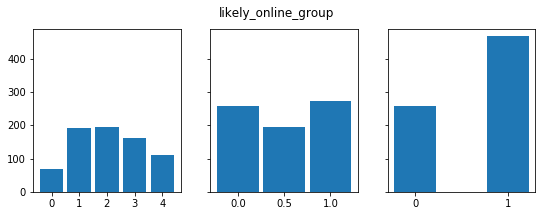

*****
likely_colleague
0: 5 0.85 1: 3 0.7 2: 2 0.4


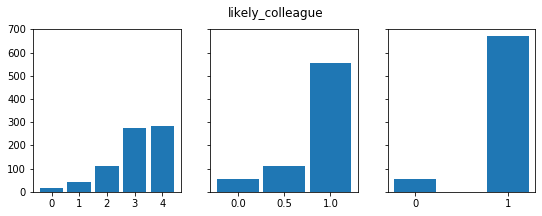

*****
likely_meetup
0: 5 0.85 1: 3 0.7 2: 2 0.4


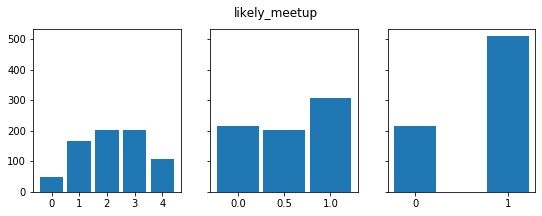

*****
likely_workshop
0: 5 0.85 1: 3 0.7 2: 2 0.4


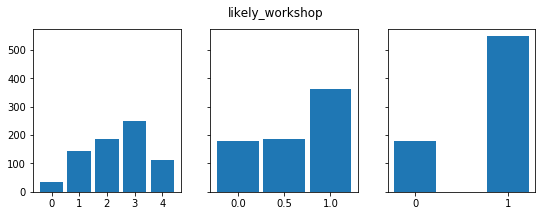

*****
factor_speaker
0: 5 0.85 1: 3 0.7 2: 2 0.4


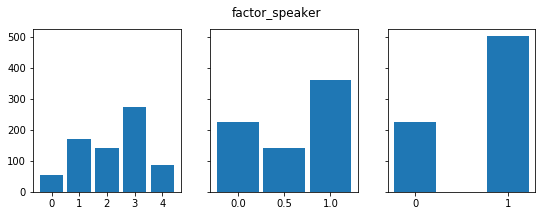

*****
factor_diverse_speak
0: 5 0.85 1: 3 0.7 2: 2 0.4


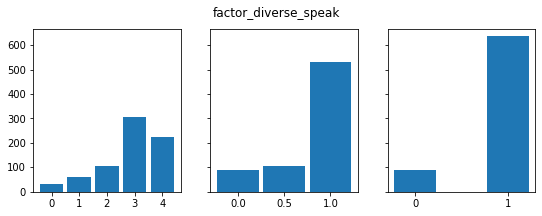

*****
factor_topics
0: 5 0.85 1: 3 0.7 2: 2 0.4


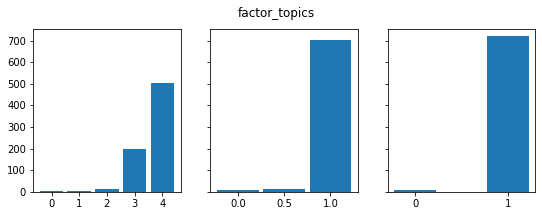

*****
factor_format_sessions
0: 5 0.85 1: 3 0.7 2: 2 0.4


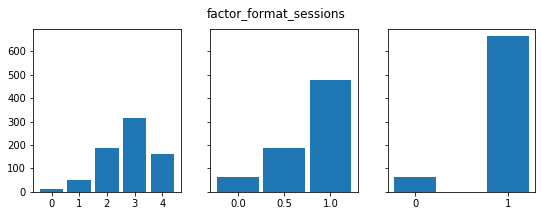

*****
factor_size
0: 5 0.85 1: 3 0.7 2: 2 0.4


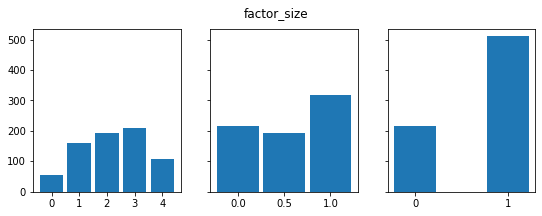

*****
factor_network
0: 5 0.85 1: 3 0.7 2: 2 0.4


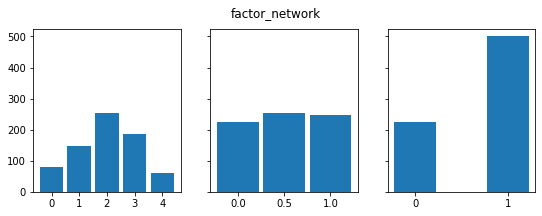

*****
factor_variety_attend
0: 5 0.85 1: 3 0.7 2: 2 0.4


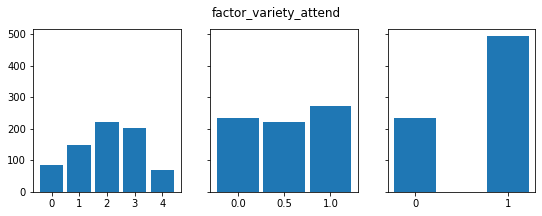

*****
factor_code
0: 5 0.85 1: 3 0.7 2: 2 0.4


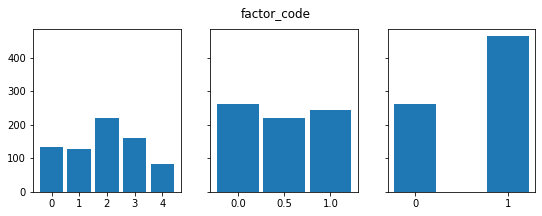

*****
factor_location
0: 5 0.85 1: 3 0.7 2: 2 0.4


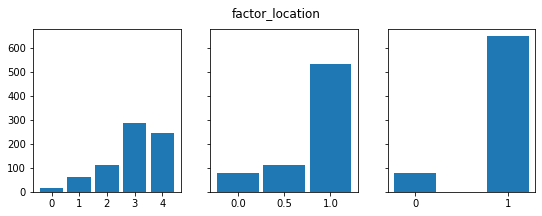

*****
factor_ability_to_pay
0: 5 0.85 1: 3 0.7 2: 2 0.4


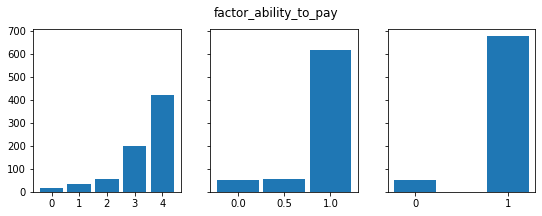

*****
ideal_multi_track
0: 2 0.4 1: 2 0.4 2: 2 0.4


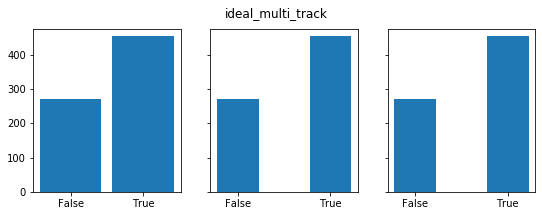

*****
ideal_single_track
0: 2 0.4 1: 2 0.4 2: 2 0.4


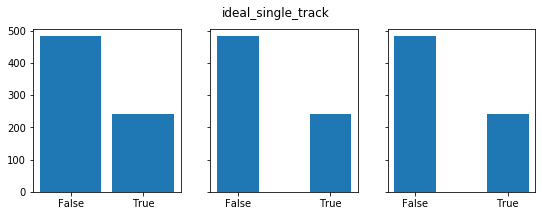

*****
ideal_unconference
0: 2 0.4 1: 2 0.4 2: 2 0.4


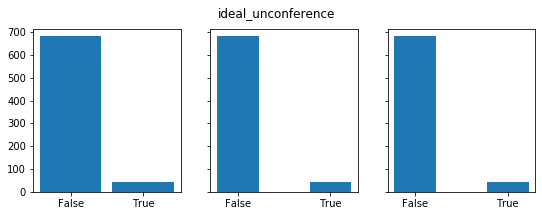

*****
session_keynote
0: 5 0.85 1: 3 0.7 2: 2 0.4


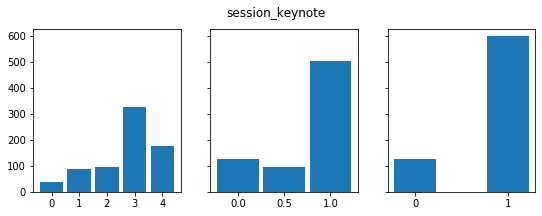

*****
session_long_talk
0: 5 0.85 1: 3 0.7 2: 2 0.4


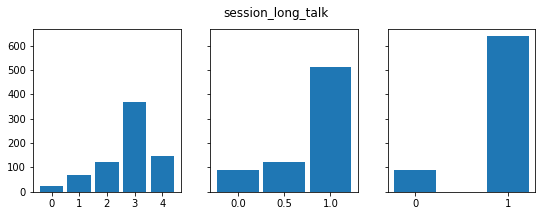

*****
session_short_talk
0: 5 0.85 1: 3 0.7 2: 2 0.4


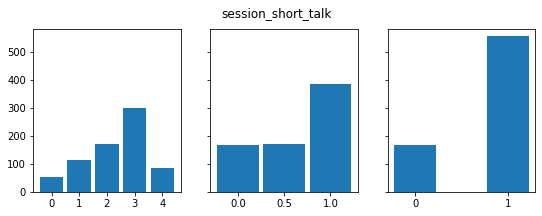

*****
session_workshop
0: 5 0.85 1: 3 0.7 2: 2 0.4


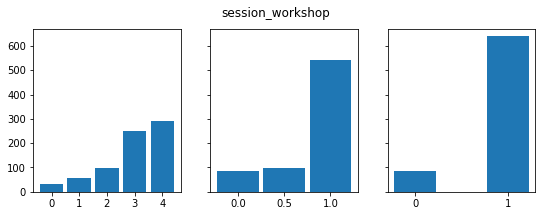

*****
session_network
0: 5 0.85 1: 3 0.7 2: 2 0.4


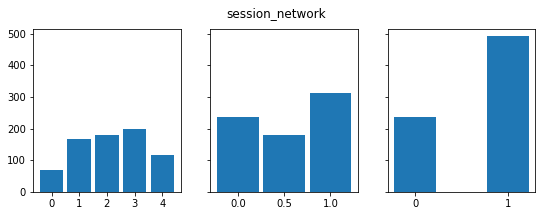

*****
session_social_event
0: 5 0.85 1: 3 0.7 2: 2 0.4


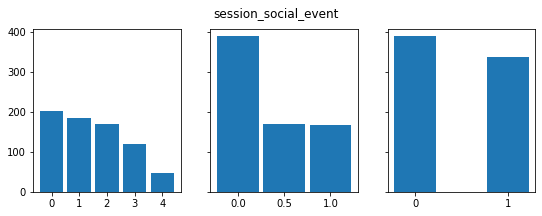

*****
session_qa
0: 5 0.85 1: 3 0.7 2: 2 0.4


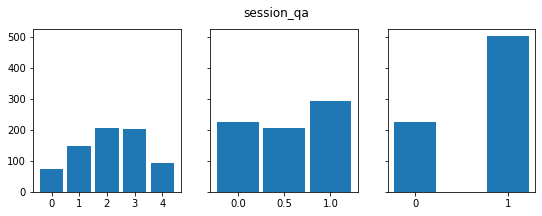

*****
sesson_topic_tables
0: 5 0.85 1: 3 0.7 2: 2 0.4


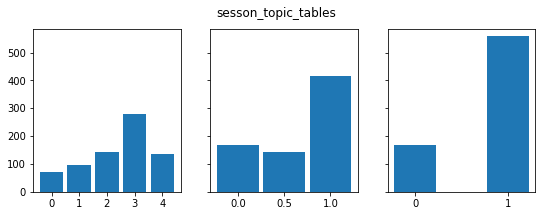

*****
target
0: 3 0.7 1: 3 0.7 2: 3 0.7


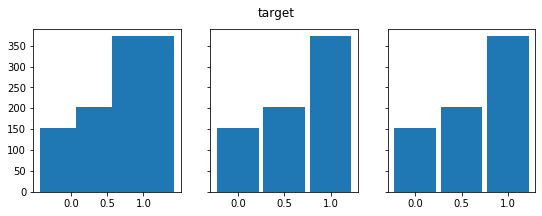

*****
persona_id
0: 5 0.85 1: 5 0.85 2: 5 0.85


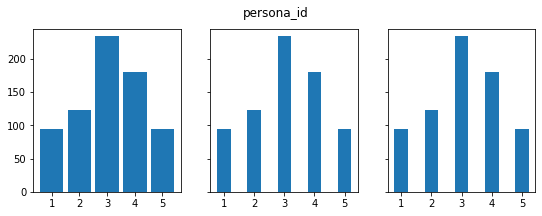

*****
job_taxo
0: 9 0.925 1: 9 0.925 2: 9 0.925


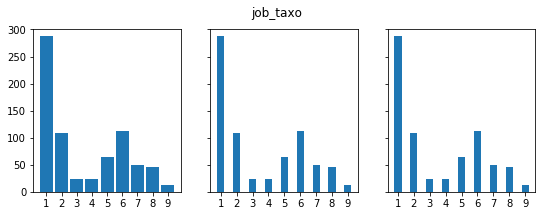

*****


In [22]:
countplot_tricols(df0=df, df1=dfrecode3, df2=dfrecode2, cols=x)

In [23]:
for xs in x:
    print(xs, type(df[[xs]]))

job_conduct_res <class 'pandas.core.frame.DataFrame'>
job_analyze_res <class 'pandas.core.frame.DataFrame'>
job_buy_res_report <class 'pandas.core.frame.DataFrame'>
job_manage_res_proj <class 'pandas.core.frame.DataFrame'>
job_observe_res <class 'pandas.core.frame.DataFrame'>
job_plan_res <class 'pandas.core.frame.DataFrame'>
job_teach_res <class 'pandas.core.frame.DataFrame'>
job_advocate_res <class 'pandas.core.frame.DataFrame'>
job_hire_res_vendor <class 'pandas.core.frame.DataFrame'>
job_lead_res_team <class 'pandas.core.frame.DataFrame'>
exp_conduct_res <class 'pandas.core.frame.DataFrame'>
exp_analyze_res <class 'pandas.core.frame.DataFrame'>
exp_buy_res_report <class 'pandas.core.frame.DataFrame'>
exp_manage_res_proj <class 'pandas.core.frame.DataFrame'>
exp_observe_res <class 'pandas.core.frame.DataFrame'>
exp_plan_res <class 'pandas.core.frame.DataFrame'>
exp_teach_res <class 'pandas.core.frame.DataFrame'>
exp_advocate_res <class 'pandas.core.frame.DataFrame'>
exp_hire_res_ven

In [24]:
def display_cats(col):

    display(df[col].value_counts().sort_index())
    display(dfrecode3[col].value_counts().sort_index())
    display(dfrecode2[col].value_counts().sort_index())

In [37]:
chk_df = dfrecode2
chk_col = 'job_manage_res_proj'
vs_col = 'target'

observed = pd.crosstab(index=chk_df[chk_col], columns=chk_df[vs_col])
observed

target,0.0,0.5,1.0
job_manage_res_proj,,,
0,31,57,75
1,121,145,297


## Chi2
[*Back to top*](#Contents)

In [26]:
def get_chi2_results(
    chk_df, 
    chk_col, 
    vs_col, 
    display_obs=False,
    print_it=False, 
    return_all=False
):
    if print_it:
        print(f'chk_df  = {chk_df.shape}')
        print(f'chk_col = {chk_df[chk_col].name}')
        print(f'vs_col  = {chk_df[vs_col].name}')
    
    observed = pd.crosstab(index=chk_df[chk_col], columns=chk_df[vs_col])
    if display_obs: # Jupyter notebooks only #
        display(observed) # Jupyter notebooks only #
    chi2, p, degf, expected = stats.chi2_contingency(observed)    
    if print_it:
        print('Observed\n')
        print(observed.values)
        print('---\nExpected\n')
        print(expected)
        print('---\n')
        print(f'degf  = {degf:d}')
        print(f'chi^2 = {chi2:.4f}')
        print(f'p     = {p:.4f}')
    if return_all:
        return chi2, p, degf, expected, observed
    else:
        return p

In [36]:
chk_df=dfrecode2
chk_col='job_observe_res'
vs_col='target'

get_chi2_results(
    chk_df=chk_df, 
    chk_col=chk_col, 
    vs_col=vs_col, 
    display_obs=True,
    print_it=True, 
    return_all=False
)


chk_df  = (726, 78)
chk_col = job_observe_res
vs_col  = target


target,0.0,0.5,1.0
job_observe_res,,,
0,77,87,146
1,75,115,226


Observed

[[ 77  87 146]
 [ 75 115 226]]
---
Expected

[[ 64.90358127  86.25344353 158.84297521]
 [ 87.09641873 115.74655647 213.15702479]]
---

degf  = 2
chi^2 = 5.7580
p     = 0.0562


0.05619185140287337

In [38]:
chk_df = dfrecode3
chk_col = 'job_observe_res'
vs_col = 'target'

get_chi2_results(
    chk_df=chk_df, 
    chk_col=chk_col, 
    vs_col=vs_col, 
    display_obs=True,
    print_it=True, 
    return_all=False
)

chk_df  = (726, 78)
chk_col = job_observe_res
vs_col  = target


target,0.0,0.5,1.0
job_observe_res,,,
0.0,77,87,146
0.5,26,33,64
1.0,49,82,162


Observed

[[ 77  87 146]
 [ 26  33  64]
 [ 49  82 162]]
---
Expected

[[ 64.90358127  86.25344353 158.84297521]
 [ 25.75206612  34.2231405   63.02479339]
 [ 61.34435262  81.52341598 150.1322314 ]]
---

degf  = 4
chi^2 = 6.7855
p     = 0.1477


0.14766706366037174

In [109]:
def chi2_cols(df, cols, target=None, print_it=False):
    chi2_df=pd.DataFrame(columns=['chk_col', 'vs_col', 'p_val'])
    hits, atts = 0, 0    
    chk_cols = [col for col in cols if col in df.columns]
    if target:
        iterlist = [(col, target) for col in chk_cols if col != target]
    else:
        iterlist = it.combinations(chk_cols, 2)
    for chk_col, vs_col in iterlist:
        atts += 1
        pval = get_chi2_results(
            chk_df=df, 
            chk_col=chk_col,
            vs_col=vs_col, 
            display_obs=False,
            print_it=False, 
            return_all=False
        )
        if round(pval, 3) < .051:
            hits +=1
            if print_it:
                print(f'Hit {hits} of {atts}:')
                print(f'columns = {chk_col} : {vs_col}')
                print(f'pval    = {pval:.5f}\n')
        chi2_df = chi2_df.append({
            'chk_col': chk_col, 
            'vs_col': vs_col, 
            'p_val': pval}
        , ignore_index=True)
    if print_it:
        print(f'Found {hits} hits out of {atts} columns checked.')
    return chi2_df

In [110]:
chi2_2 = chi2_cols(dfrecode3, x, 'target')
chi2_2

,chk_col,vs_col,p_val
0,job_conduct_res,target,1.194133e-02
1,job_analyze_res,target,5.532569e-03
2,job_buy_res_report,target,2.310675e-01
3,job_manage_res_proj,target,8.647389e-02
4,job_observe_res,target,1.476671e-01
5,job_plan_res,target,8.250707e-02
6,job_teach_res,target,2.376957e-02
7,job_advocate_res,target,2.697162e-02
8,job_hire_res_vendor,target,4.798780e-01
9,job_lead_res_team,target,3.750102e-01


In [114]:
chi2_3 = chi2_cols(dfrecode2, x, 'target')
chi2_3[chi2_3.p_val<=.05]

,chk_col,vs_col,p_val
0,job_conduct_res,target,1.642495e-02
1,job_analyze_res,target,5.173208e-03
6,job_teach_res,target,2.736655e-02
19,exp_lead_res_team,target,4.339279e-03
21,learning_talks,target,4.932926e-02
23,learning_meetup,target,4.428605e-10
24,learning_workshop,target,2.042493e-37
27,likely_book,target,3.187749e-02
28,likely_online_group,target,4.377515e-02
29,likely_colleague,target,4.923665e-02


In [115]:
chi2_2all = chi2_cols(dfrecode2, x)
chi2_2all[chi2_2all.p_val<=.05]

,chk_col,vs_col,p_val
0,job_conduct_res,job_analyze_res,4.413844e-74
2,job_conduct_res,job_manage_res_proj,2.240887e-14
3,job_conduct_res,job_observe_res,3.171411e-07
4,job_conduct_res,job_plan_res,4.434456e-51
15,job_conduct_res,exp_teach_res,3.085064e-04
...,...,...,...
1526,session_social_event,sesson_topic_tables,3.453317e-09
1530,session_qa,sesson_topic_tables,7.025203e-35
1537,target,persona_id,3.619994e-03
1538,target,job_taxo,1.455262e-04


In [119]:
ifull(chi2_2all.sort_values('p_val'))

,chk_col,vs_col,p_val
1539,persona_id,job_taxo,1.131788e-310
505,exp_conduct_res,exp_analyze_res,1.778883e-125
553,exp_analyze_res,exp_plan_res,1.715135e-115
509,exp_conduct_res,exp_plan_res,7.223248e-113
1449,ideal_multi_track,ideal_single_track,6.312733e-109
552,exp_analyze_res,exp_observe_res,2.344851e-89
679,exp_observe_res,exp_plan_res,4.698202e-88
508,exp_conduct_res,exp_observe_res,1.537758e-85
638,exp_manage_res_proj,exp_plan_res,6.056946e-83
1351,factor_size,factor_variety_attend,2.385079e-78
